In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [38]:
df.shape

(1000, 3)

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_996\1282200442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_996\1282200442.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

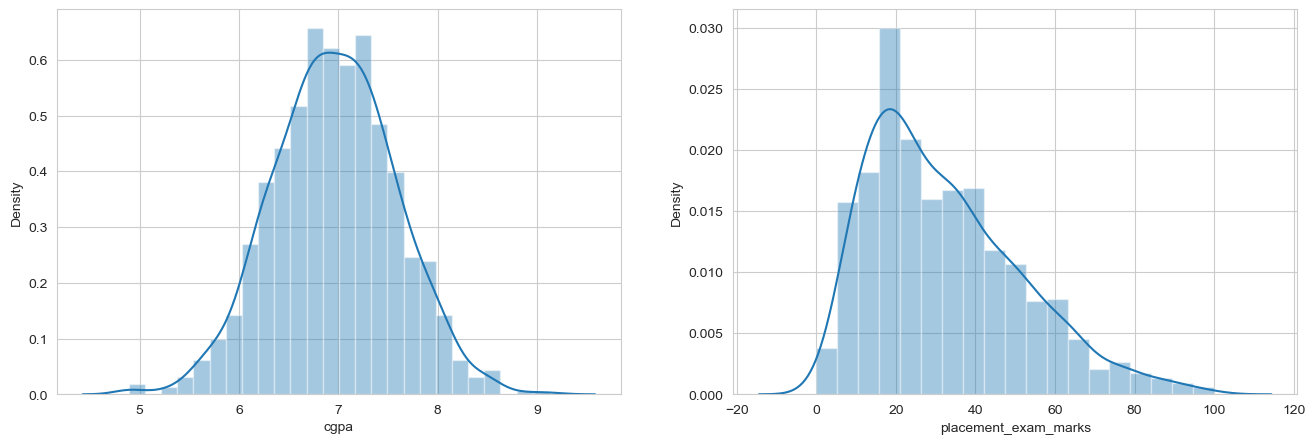

In [39]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [40]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [41]:
highest_allowed_cgpa = df['cgpa'].mean() + 3*df['cgpa'].std()
lowest_allowed_cgpa = df['cgpa'].mean() - 3*df['cgpa'].std()
lowest_allowed_cgpa, highest_allowed_cgpa

(5.113546374602832, 8.808933625397168)

# Approach-1 : Finding the outlier

In [42]:
df[(df['cgpa']>highest_allowed_cgpa) | df['cgpa']<lowest_allowed_cgpa]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### trim outlier

In [43]:
outlier_trim_df = df[(df['cgpa'] < highest_allowed_cgpa) & (df['cgpa'] > lowest_allowed_cgpa)]
outlier_trim_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [44]:
outlier_trim_df.shape

(995, 3)

#  Approach-2: Calculating the Zscore

In [45]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [46]:
df[(df['cgpa_zscore'] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [47]:
df[(df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [48]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## 1. trim outlier

In [49]:
outlier_trim_df2 = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
outlier_trim_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## 2. Cap outlier

In [50]:
highest_allowed_cgpa = df['cgpa'].mean() + 3*df['cgpa'].std()
lowest_allowed_cgpa = df['cgpa'].mean() - 3*df['cgpa'].std()
lowest_allowed_cgpa, highest_allowed_cgpa

(5.113546374602832, 8.808933625397168)

In [51]:
outlier_cap_df2 = df

In [52]:
outlier_cap_df2['cgpa'] = np.where(
    df['cgpa'] > highest_allowed_cgpa,
    highest_allowed_cgpa,
    np.where(
        df['cgpa'] < lowest_allowed_cgpa,
        lowest_allowed_cgpa,
        df['cgpa']
    )
)
outlier_cap_df2.shape

(1000, 4)

In [53]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
